In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('input/heart.csv')
data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [2]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [3]:
data.Smoking.replace(('Yes','No'), (1,0), inplace = True)
data.HeartDisease.replace(('Yes','No'), (1,0), inplace = True)
data.AlcoholDrinking.replace(('Yes','No'), (1,0), inplace = True)
data.Stroke.replace(('Yes','No'), (1,0), inplace = True)
data.Sex.replace(('Male','Female'), (1,0), inplace = True)
data.Diabetic.replace(('Yes','No','No, borderline diabetes','Yes (during pregnancy)'), (1,0,0,0), inplace = True)
data.PhysicalActivity.replace(('Yes','No'), (1,0), inplace = True)
data.AgeCategory.replace(('18-24','25-29','30-34','35-39','40-44','45-49','50-54',
                          '55-59','60-64','65-69','70-74','75-79','80 or older'),
                         (0,0,0,0,0,1,1,1,1,1,1,1,1), inplace = True)
data.GenHealth.replace(('Excellent', 'Very good', 'Good', 'Fair', 'Poor'), (5,4,3,2,1), inplace = True)
data.DiffWalking.replace(('Yes','No'), (1,0), inplace =True)
data.Asthma.replace(('Yes','No'), (1,0), inplace =True)
data.KidneyDisease.replace(('Yes','No'), (1,0), inplace =True)
data.SkinCancer.replace(('Yes','No'), (1,0), inplace =True)

In [4]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,1,White,1,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,1,White,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,1,White,1,1,2,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,1,White,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,0,White,0,1,4,8,0,0,0


In [5]:
data.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [6]:
X = data.drop(['HeartDisease','Race'], axis = 1)
Y = data.HeartDisease

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
sm.fit(X,Y)
x_resem, y_resem = sm.fit_resample(X, Y)

In [8]:
y_resem.value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_resem, y_resem, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

In [11]:
max_features = int(x_resem.shape[0] * 0.8)
max_features

467875

In [12]:
bag_clf = BaggingClassifier(LogisticRegression(), n_estimators = 50, 
                            max_samples = max_features, bootstrap = True, 
                            n_jobs = -1, oob_score = True)
bag_clf.fit(xtrain, ytrain)
bag_clf.oob_score_

0.735824739513759

In [13]:
lrpred = bag_clf.predict(xtest)
print("Logistic Regression : Accuracy Score : ", accuracy_score(ytest, lrpred))
print("Logistic Regression : Precision Score : ", precision_score(ytest, lrpred))
print("Logistic Regression : Recall Score : ", recall_score(ytest, lrpred))
print("Logistic Regression : F1 Score : ", f1_score(ytest, lrpred))

Logistic Regression : Accuracy Score :  0.7345279518504902
Logistic Regression : Precision Score :  0.7287161374162807
Logistic Regression : Recall Score :  0.7475729814726191
Logistic Regression : F1 Score :  0.7380241289125116


In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(ytest, lrpred)

array([[42178, 16283],
       [14769, 43739]], dtype=int64)

In [16]:
cm_rf_generated=confusion_matrix(ytest, lrpred)
cm_rf_generated

array([[42178, 16283],
       [14769, 43739]], dtype=int64)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(xtrain, ytrain)


KNeighborsClassifier()

In [18]:
knn_preds = knn_clf.predict(xtest)
print("KNN : Accuracy Score : ", accuracy_score(ytest, knn_preds))
print("KNN : Precision Score : ", precision_score(ytest, knn_preds))
print("KNN : Recall Score : ", recall_score(ytest, knn_preds))
print("KNN : F1 Score : ", f1_score(ytest, knn_preds))


KNN : Accuracy Score :  0.8291000179534749
KNN : Precision Score :  0.782929337446746
KNN : Recall Score :  0.9108839816777193
KNN : F1 Score :  0.8420736620897786


In [19]:
confusion_matrix(ytest, knn_preds )

array([[43685, 14776],
       [ 5214, 53294]], dtype=int64)

In [20]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 50, 
                            max_samples = max_features, bootstrap = True, 
                            n_jobs = -1, oob_score = True)
bag_clf.fit(xtrain, ytrain)
bag_clf.oob_score_

0.8646518835158964

In [21]:
dt_pred = bag_clf.predict(xtest)
print("Decision Tree : Accuracy Score : ", accuracy_score(ytest, dt_pred))
print("Decision Tree : Precision Score : ", precision_score(ytest, dt_pred))
print("Decision Tree : Recall Score : ", recall_score(ytest, dt_pred))
print("Decision Tree : F1 Score : ", f1_score(ytest, dt_pred))

Decision Tree : Accuracy Score :  0.8684095786062974
Decision Tree : Precision Score :  0.8585112751945719
Decision Tree : Recall Score :  0.8823408764613386
Decision Tree : F1 Score :  0.8702629804450438


In [22]:
confusion_matrix(ytest, dt_pred )

array([[49953,  8508],
       [ 6884, 51624]], dtype=int64)

In [23]:
rnd_clf = RandomForestClassifier(n_estimators = 50, n_jobs = -1, oob_score= True)
rnd_clf.fit(xtrain, ytrain)
rnd_clf.oob_score_

0.8610782794549826

In [24]:
rnd_pred = rnd_clf.predict(xtest)
print("Random Forest : Accuracy Score : ", accuracy_score(ytest, rnd_pred))
print("Random Forest : Precision Score : ", precision_score(ytest, rnd_pred))
print("Random Forest : Recall Score : ", recall_score(ytest, rnd_pred))
print("Random Forest : F1 Score : ", f1_score(ytest, rnd_pred))

Random Forest : Accuracy Score :  0.8626986637485146
Random Forest : Precision Score :  0.8518684306508837
Random Forest : Recall Score :  0.8782217816366993
Random Forest : F1 Score :  0.8648443943244745


In [25]:
confusion_matrix(ytest, rnd_pred  )

array([[49526,  8935],
       [ 7125, 51383]], dtype=int64)

In [26]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
bag_clf = BaggingClassifier(nb_clf, n_estimators=50, max_samples=max_features,
                            bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(xtrain, ytrain)
bag_clf.oob_score_


0.6981458722949506

In [27]:
gnb_pred = bag_clf.predict(xtest)
print("GaussianNB : Accuracy Score : ", accuracy_score(ytest, gnb_pred))
print("GaussianNB : Precision Score : ", precision_score(ytest, gnb_pred))
print("GaussianNB : Recall Score : ", recall_score(ytest, gnb_pred))
print("GaussianNB : F1 Score : ", f1_score(ytest, gnb_pred))

GaussianNB : Accuracy Score :  0.6980482008053416
GaussianNB : Precision Score :  0.713318492079554
GaussianNB : Recall Score :  0.6626615163738292
GaussianNB : F1 Score :  0.6870575309451449


In [28]:
confusion_matrix(ytest, gnb_pred  )

array([[42879, 15582],
       [19737, 38771]], dtype=int64)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
GBCModel = GradientBoostingClassifier(n_estimators=150, max_depth=18, learning_rate=0.5, random_state=44)
GBCModel.fit(xtrain, ytrain)
GBCModel.score(xtrain, ytrain)

0.9891124766230297

In [30]:
gbc_preds = GBCModel.predict(xtest)
print("GradientBoosting : Accuracy Score : ", accuracy_score(ytest, gbc_preds))
print("GradientBoosting : Precision Score : ", precision_score(ytest, gbc_preds))
print("GradientBoosting : Recall Score : ", recall_score(ytest, gbc_preds))
print("GradientBoosting : F1 Score : ", f1_score(ytest, gbc_preds))

GradientBoosting : Accuracy Score :  0.9159691884174439
GradientBoosting : Precision Score :  0.9140426979671685
GradientBoosting : Recall Score :  0.9183701374171054
GradientBoosting : F1 Score :  0.9162013078359323


In [31]:
confusion_matrix(ytest, gbc_preds )

array([[53408,  5053],
       [ 4776, 53732]], dtype=int64)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [25]:
!pip install python-docx

  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184508 sha256=9681d243decad148d6dc0bcae6f7e88ceb9cf633d59e76dc430f5244b8b8ab96
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\83\8b\7c\09ae60c42c7ba4ed2dddaf2b8b9186cb105255856d6ed3dba5
Successfully built python-docx


<AxesSubplot:xlabel='Smoking', ylabel='count'>

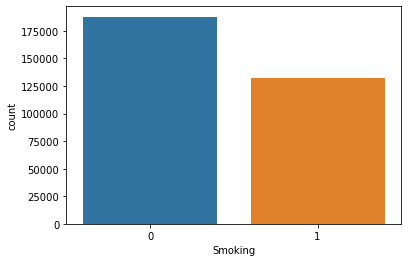

In [33]:
sbn.countplot(data['Smoking'])

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

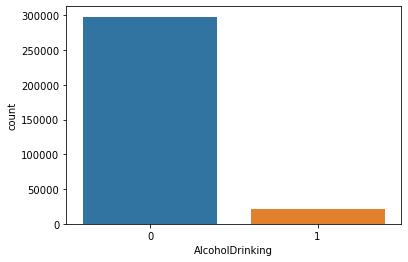

In [34]:
sbn.countplot(data['AlcoholDrinking'])

<AxesSubplot:xlabel='Stroke', ylabel='count'>

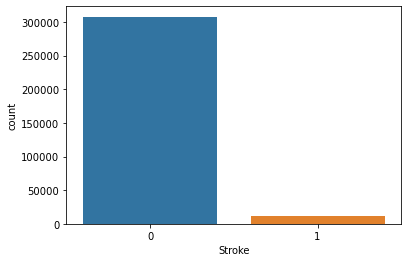

In [35]:
sbn.countplot(data['Stroke'])

<AxesSubplot:xlabel='DiffWalking', ylabel='count'>

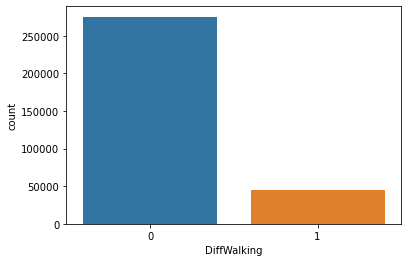

In [36]:
sbn.countplot(data['DiffWalking'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

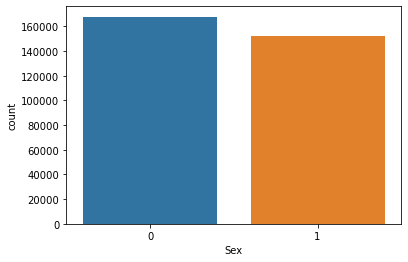

In [37]:
sbn.countplot(data['Sex'])

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

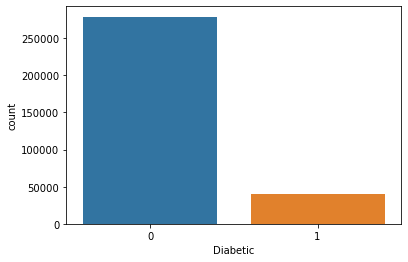

In [38]:
sbn.countplot(data['Diabetic'])

<AxesSubplot:xlabel='PhysicalActivity', ylabel='count'>

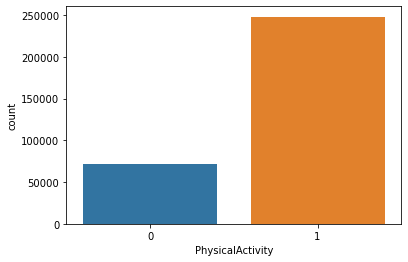

In [39]:
sbn.countplot(data['PhysicalActivity'])

In [40]:
X= data.loc[:, data.columns != 'HeartDisease']
y= data['HeartDisease']
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,1,White,1,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,1,White,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,1,White,1,1,2,8,1,0,0
3,24.21,0,0,0,0,0,0,0,1,White,0,0,3,6,0,0,1
4,23.71,0,0,0,28,0,1,0,0,White,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7,0,1,1,1,Hispanic,1,0,2,6,1,0,0
319791,29.84,1,0,0,0,0,0,1,0,Hispanic,0,1,4,5,1,0,0
319792,24.24,0,0,0,0,0,0,0,1,Hispanic,0,1,3,6,0,0,0
319793,32.81,0,0,0,0,0,0,0,0,Hispanic,0,0,3,12,0,0,0


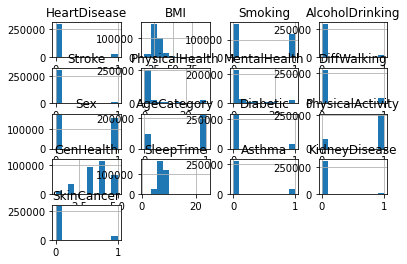

In [41]:
data.hist()
plt.show()

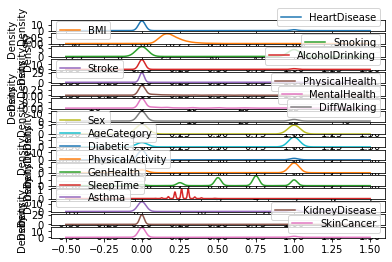

In [42]:
data.plot(kind='density',subplots=True,sharex=False)
plt.show()

array([[<AxesSubplot:xlabel='HeartDisease', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='BMI', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='Smoking', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='AlcoholDrinking', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='Stroke', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='PhysicalHealth', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='MentalHealth', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='DiffWalking', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='AgeCategory', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='Diabetic', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='PhysicalActivity', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='GenHealth', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='SleepTime', ylabel='HeartDisease'>,
        <AxesSubplot:xlabel='Asthma', ylabel='HeartDisease'>,
        <AxesSubpl

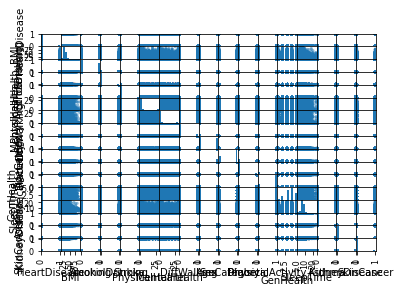

In [43]:
pd.plotting.scatter_matrix(data)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

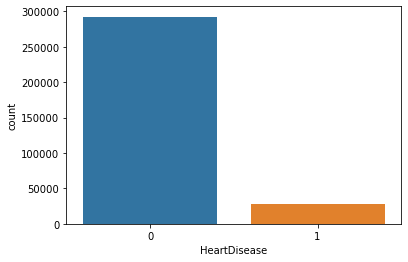

In [44]:
sbn.countplot(data['HeartDisease'])

<AxesSubplot:xlabel='Smoking', ylabel='count'>

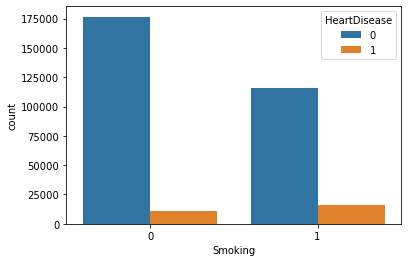

In [45]:
sbn.countplot(x=data['Smoking'],hue=data['HeartDisease'])

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

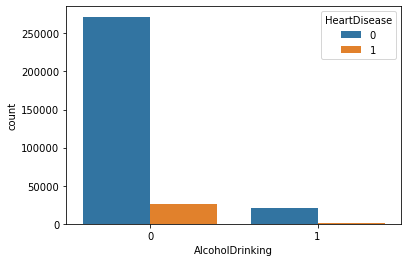

In [46]:
sbn.countplot(x=data['AlcoholDrinking'],hue=data['HeartDisease'])

<AxesSubplot:xlabel='Stroke', ylabel='count'>

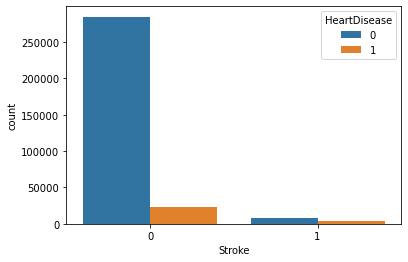

In [47]:
sbn.countplot(x=data['Stroke'],hue=data['HeartDisease'])

<AxesSubplot:xlabel='DiffWalking', ylabel='count'>

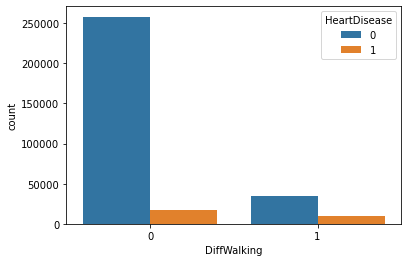

In [48]:
sbn.countplot(x=data['DiffWalking'],hue=data['HeartDisease'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

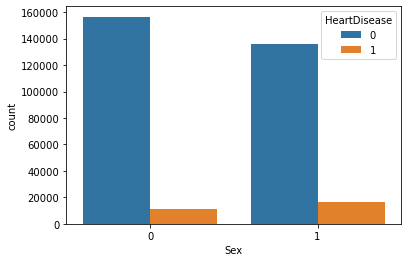

In [49]:
sbn.countplot(x=data['Sex'],hue=data['HeartDisease'])

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

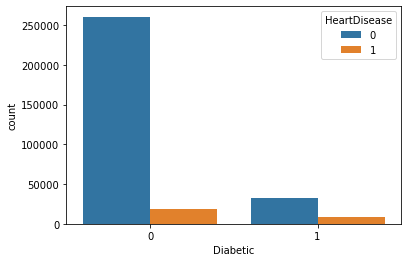

In [50]:
sbn.countplot(x=data['Diabetic'],hue=data['HeartDisease'])

<AxesSubplot:xlabel='PhysicalActivity', ylabel='count'>

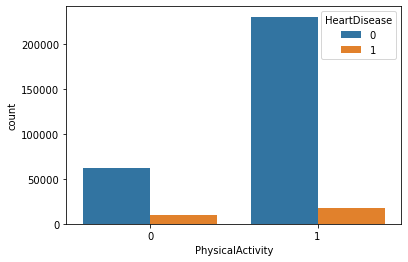

In [51]:
sbn.countplot(x=data['PhysicalActivity'],hue=data['HeartDisease'])

<AxesSubplot:xlabel='GenHealth', ylabel='count'>

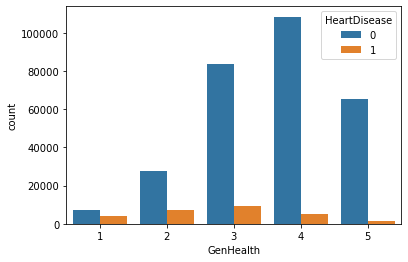

In [52]:
sbn.countplot(x=data['GenHealth'],hue=data['HeartDisease'])

<AxesSubplot:xlabel='Asthma', ylabel='count'>

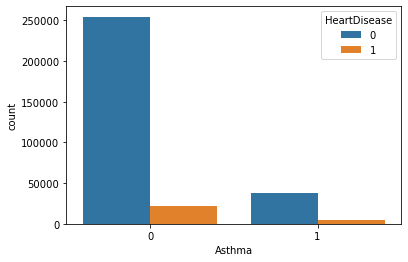

In [53]:
sbn.countplot(x=data['Asthma'],hue=data['HeartDisease'])

<AxesSubplot:xlabel='KidneyDisease', ylabel='count'>

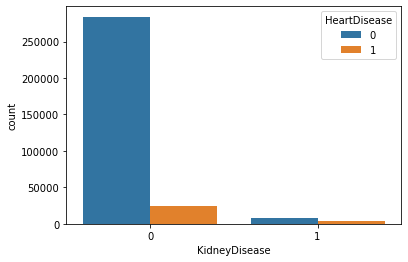

In [54]:
sbn.countplot(x=data['KidneyDisease'],hue=data['HeartDisease'])

<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

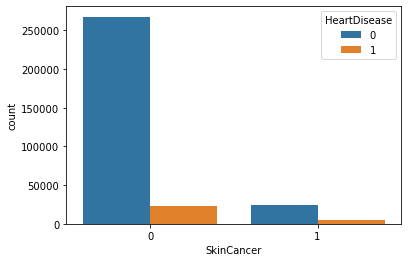

In [55]:
sbn.countplot(x=data['SkinCancer'],hue=data['HeartDisease'])

In [56]:
td = pd.read_csv('input/heart_2020_cleaned.csv')

In [57]:
td["SleepTime"] = np.where(td["SleepTime"]>=6, 0, 1)

<AxesSubplot:xlabel='SleepTime', ylabel='count'>

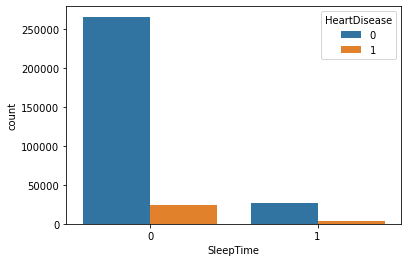

In [58]:
sbn.countplot(x=td['SleepTime'],hue=data['HeartDisease'])

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

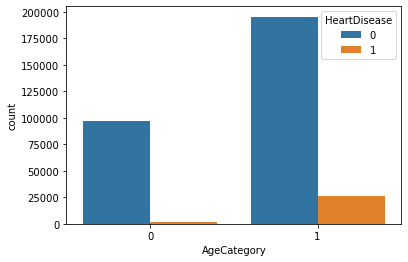

In [59]:
sbn.countplot(x=data['AgeCategory'],hue=data['HeartDisease'])

<AxesSubplot:xlabel='GenHealth', ylabel='count'>

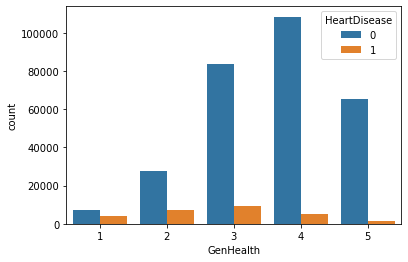

In [60]:
sbn.countplot(x=data['GenHealth'],hue=data['HeartDisease'])

In [61]:
td.BMI.replace(('0.00-18.5','18.5–24.9','25.00–29.9','30.00 or older'),
                         (1,2,3,4), inplace = True)

In [62]:
td.BMI

0         16.60
1         20.34
2         26.58
3         24.21
4         23.71
          ...  
319790    27.41
319791    29.84
319792    24.24
319793    32.81
319794    46.56
Name: BMI, Length: 319795, dtype: float64

<AxesSubplot:xlabel='BMI', ylabel='count'>

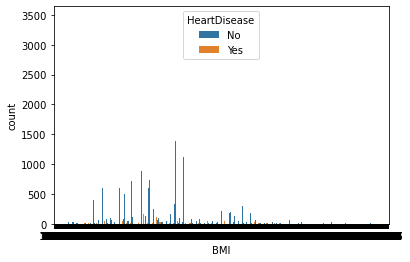

In [63]:
sbn.countplot(x=td['BMI'],hue=td['HeartDisease'])

<AxesSubplot:xlabel='SleepTime', ylabel='count'>

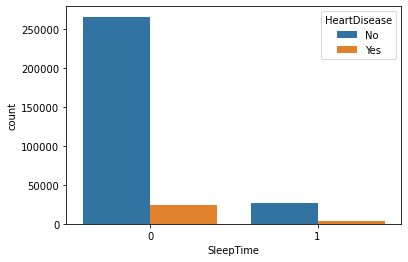

In [64]:
sbn.countplot(x=td['SleepTime'],hue=td['HeartDisease'])

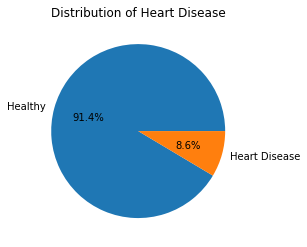

In [65]:
import matplotlib.pyplot as plt

# Assuming 'HeartDisease' is a column in your DataFrame called 'data'
heart_disease_counts = data['HeartDisease'].value_counts()

# Create a pie chart
labels = ['Healthy', 'Heart Disease']
plt.pie(heart_disease_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Heart Disease')
plt.show()


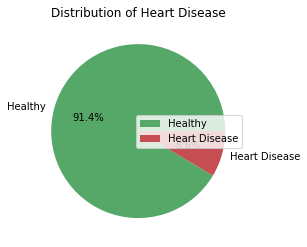

In [66]:
import matplotlib.pyplot as plt

# Assuming 'HeartDisease' is a column in your DataFrame called 'data'
heart_disease_counts = data['HeartDisease'].value_counts()

# Create a pie chart
labels = ['Healthy', 'Heart Disease']
colors = ['#55a868', '#c44e52']  # Example colors for the slices

plt.pie(heart_disease_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Heart Disease')

# Add legend in the top right corner
plt.legend(labels, loc='right')

plt.show()


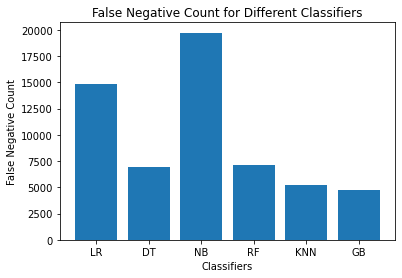

In [67]:
import matplotlib.pyplot as plt

classifiers = ['LR', 'DT', 'NB', 'RF', 'KNN', 'GB']
fn_numbers = [14809, 6897, 19736, 7158, 5214, 4776]

plt.bar(classifiers, fn_numbers)
plt.xlabel('Classifiers')
plt.ylabel('False Negative Count')
plt.title('False Negative Count for Different Classifiers')
plt.show()
